# Free Fall

## Newtonian Approach - Forces
When an object is in free fall, the only significant force acting on it is its weight:

$\sum_i \vec{F}_i = -mg\hat{z}$

### Law of Motion
$\sum_i \vec{F}_i = m \ddot{\vec{r}}$

$\Rightarrow -mg\hat{z} = m\left(\ddot{x}\hat{x} + \ddot{y}\hat{y} + \ddot{z}\hat{z} \right)$

$\Rightarrow \vec{v} = \dot{x}_0 \hat{x} + \dot{y}_0 \hat{y} + \left(- gt + \dot{z}_0 \right) \hat{z}$

$\Rightarrow \vec{r} = \left( \dot{x}_0 t + x_0 \right) \hat{x} + \left( \dot{y}_0 t + y_0 \right) \hat{y} + \left( -\frac{1}{2}g t^2 + \dot{z}_0 t + z_0 \right) \hat{z}$

### Example : Drop from a Height
$\dot{\vec{r}}_0 = \vec{0}$

$\vec{r}_0 = h\hat{z}$

$\Rightarrow \vec{v} = \left(-gt\right) \hat{z}$

$\Rightarrow \vec{r} = \left( -\frac{1}{2} g t^2 + h \right) \hat{z}$

#### Drop time
$z = 0 \Rightarrow t_\text{drop} = \sqrt{\frac{2 h}{g}}$

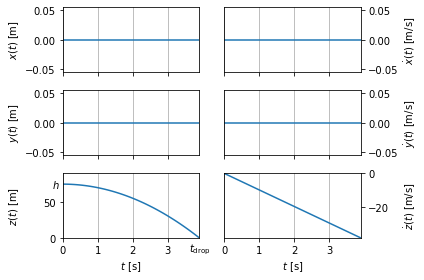

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Simulation initial conditions & parameters
start_time = 0.                                 # t_0 = 0 s
height = 75.                                    # h [in m]
standard_gravity = 9.80665                      # g [in m/s/s]

# Calculate simulation end time
drop_time = np.sqrt(2*height/standard_gravity)  # t_drop = sqrt(2 h/g)  [in s]

# Set up array of times for which the positions and velocities will be calculated
times = np.linspace(start_time, drop_time)

# Calculate positions and velocities for all times
# r = (0, 0, -(1/2) g t^2 + h)
positions = [np.zeros(len(times)), 
             np.zeros(len(times)),
             -0.5*standard_gravity*times**2+height]
# v = (0, 0, -g t)
velocities = [np.zeros(len(times)),
              np.zeros(len(times)),
              -standard_gravity*times]

# Put r & v in a single array to loop over for subplots
variables = [positions, velocities]

# Set up matplotlib subplots [sharex=True to only label x-axis on bottom plot]
variable_number = len(variables)      # 2 = position & velocity
dimension_number = len(variables[0])  # 3 = x, y, z
figure, axes = plt.subplots(dimension_number, variable_number, sharex=True)

# Set up labels for y-axes
position_labels = [r'$x(t)$ [m]', r'$y(t)$ [m]', r'$z(t)$ [m]']
velocity_labels = [r'$\dot{x}(t)$ [m/s]', r'$\dot{y}(t)$ [m/s]', r'$\dot{z}(t)$ [m/s]']
variable_labels = [position_labels, velocity_labels] 

# Loop over r & v in each spatial dimension 
for variable_index in range(len(variable_labels)):
    for dimension_index in range(len(variable_labels[variable_index])):
        axes[dimension_index][variable_index].plot(times, variables[variable_index][dimension_index])        
        axes[dimension_index][variable_index].set_ylabel(variable_labels[variable_index][dimension_index])
        axes[dimension_index][variable_index].grid(axis='x')
        axes[dimension_index][variable_index].set_xlim([times[0], times[-1]])
        variable_extrema = [np.min(variables[variable_index][dimension_index]), np.max(variables[variable_index][dimension_index])]
        if variable_extrema[0] != variable_extrema[1]:
            axes[dimension_index, variable_index].set_ylim([variable_extrema[0], 1.2*variable_extrema[1]])
        if variable_index % 2 == 1:
            axes[dimension_index][variable_index].yaxis.set_label_position('right')
            axes[dimension_index][variable_index].yaxis.tick_right()
    axes[2][variable_index].set_xlabel(r'$t$ [s]')  # label x-axis

# Label important points on subplots
axes[2][0].text(-0.05*times[-1], height, r'$h$', va='center', ha='center')           # h on z(t)
axes[2][0].text(drop_time, -0.2*height, r'$t_{\rm drop}$', va='center', ha='center')  #

# Format plot
figure.tight_layout()  # minimize white space between subplots
figure.align_labels()  # line up axis labels on subplots
plt.show()

### Example : Horizontal Launch from a Cliff
$\dot{\vec{r}}_0 = v_0\hat{x}$

$\vec{r}_0 = h\hat{z}$

$\Rightarrow \vec{v} = v_0 \hat{x} + \left(-gt\right) \hat{z}$

$\Rightarrow \vec{r} = v_0 t \, \hat{x} + \left( -\frac{1}{2} g t^2 + h \right) \hat{z}$

#### Drop time
$z = 0 \Rightarrow t_\text{drop} = \sqrt{\frac{2 h}{g}}$

#### Range
$R = v_0 t_\text{drop}$

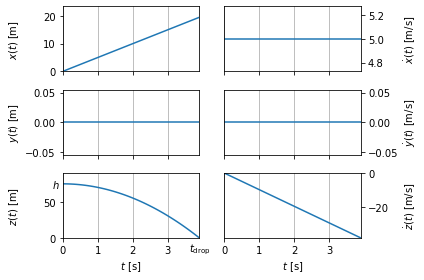

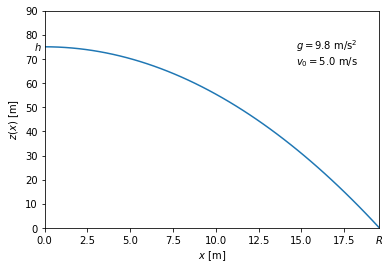

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Simulation initial conditions & parameters
start_time = 0.                                 # t_0 = 0 s
height = 75.                                    # h [in m]
initial_velocity = 5.                           # v_0 [in m/s]
standard_gravity = 9.80665                      # g [in m/s/s]

# Calculate simulation end time
drop_time = np.sqrt(2*height/standard_gravity)  # t_drop = sqrt(2 h/g)  [in s]

# Set up array of times for which the positions and velocities will be calculated
times = np.linspace(start_time, drop_time)

# Calculate positions and velocities for all times
# r = (v_0 t, 0, -(1/2) g t^2 + h)
positions = [initial_velocity*times,
             np.zeros(len(times)),
             -0.5*standard_gravity*times**2+height]
# v = (v_0, 0, -g t)
velocities = [np.full(len(times), initial_velocity),
              np.zeros(len(times)),
              -standard_gravity*times]

# Put r & v in a single array to loop over for subplots
variables = [positions, velocities]

# Set up matplotlib subplots [sharex=True to only label x-axis on bottom plot]
variable_number = len(variables)      # 2 = position & velocity
dimension_number = len(variables[0])  # 3 = x, y, z
figure, axes = plt.subplots(dimension_number, variable_number, sharex=True)

# Set up labels for y-axes
position_labels = [r'$x(t)$ [m]', r'$y(t)$ [m]', r'$z(t)$ [m]']
velocity_labels = [r'$\dot{x}(t)$ [m/s]', r'$\dot{y}(t)$ [m/s]', r'$\dot{z}(t)$ [m/s]']
variable_labels = [position_labels, velocity_labels] 

# Loop over r & v in each spatial dimension 
for variable_index in range(len(variable_labels)):
    for dimension_index in range(len(variable_labels[variable_index])):
        axes[dimension_index][variable_index].plot(times, variables[variable_index][dimension_index])        
        axes[dimension_index][variable_index].set_ylabel(variable_labels[variable_index][dimension_index])
        axes[dimension_index][variable_index].grid(axis='x')
        axes[dimension_index][variable_index].set_xlim([times[0], times[-1]])
        variable_extrema = [np.min(variables[variable_index][dimension_index]), np.max(variables[variable_index][dimension_index])]
        if variable_extrema[0] != variable_extrema[1]:
            axes[dimension_index, variable_index].set_ylim([variable_extrema[0], 1.2*variable_extrema[1]])
        if variable_index % 2 == 1:
            axes[dimension_index][variable_index].yaxis.set_label_position('right')
            axes[dimension_index][variable_index].yaxis.tick_right()
    axes[2][variable_index].set_xlabel(r'$t$ [s]')  # label x-axis

# Label important points on subplots
axes[2][0].text(-0.05*times[-1], height, r'$h$', va='center', ha='center')           # h on z(t)
axes[2][0].text(drop_time, -0.2*height, r'$t_{\rm drop}$', va='center', ha='center')  #

# Format plot
figure.tight_layout()  # minimize white space between subplots
figure.align_labels()  # line up axis labels on subplots
plt.show()

# Plot z(x)
plt.plot(positions[0], positions[2])
plt.xlabel(r'$x$ [m]')
plt.ylabel(r'$z(x)$ [m]')
plt.xlim([np.min(positions[0]), np.max(positions[0])])
x_range = plt.xlim()[1] - plt.xlim()[0]
plt.ylim([np.min(positions[2]), 1.2*np.max(positions[2])])
y_range = plt.ylim()[1] - plt.ylim()[0]
plt.text(-0.02*x_range+plt.xlim()[0], height, r'$h$', va='center', ha='center')
plt.text(initial_velocity*drop_time, -0.05*y_range+plt.ylim()[0], r'$R$', va='center', ha='center')
label_string = rf'$g = ${standard_gravity:.1f} m/s$^2$'
label_string += '\n'
label_string += rf'$v_0 = ${initial_velocity:.1f} m/s'
plt.text(plt.xlim()[0]+0.75*x_range, plt.ylim()[0]+0.75*y_range, label_string)
plt.show()

### Example : Angled Launch on a Flat
$\dot{\vec{r}}_0 = v_0 \left(\cos \theta_0 \hat{x} + \sin \theta_0 \hat{z}\right)$

$\vec{r}_0 = \vec{0}$

$\Rightarrow \vec{v} = v_0 \cos \theta_0\, \hat{x} + \left( -gt + v_0 \sin \theta_0 \right) \hat{z}$

$\Rightarrow \vec{r} = v_0 \cos \theta_0\, t \, \hat{x} + \left( -\frac{1}{2} g t^2 + v_0 \sin \theta_0\,  t\right) \hat{z}$

#### Flight time
$z = 0\Rightarrow -\frac{1}{2}g t_\text{flight} + v_0 \sin \theta_0 = 0
\rightarrow t_\text{flight} = \frac{2 v_0 \sin \theta_0}{g}$

#### Range
$\Rightarrow R = v_0 \cos \theta_0\, t_\text{flight}$

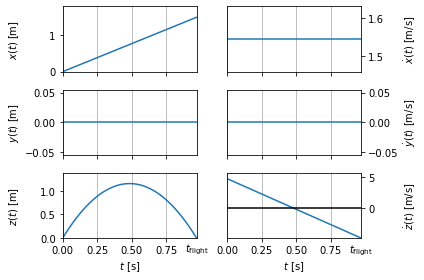

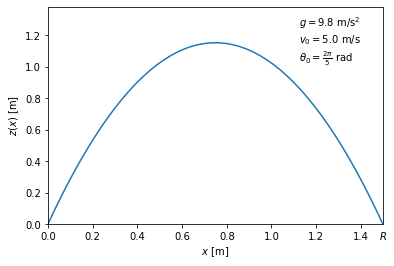

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from fractions import Fraction

# Simulation initial conditions & parameters
start_time = 0.                                 # t_0 = 0 [in s]
initial_velocity = 5.                           # v_0 [in m/s]
launch_angle = 2*np.pi/5                        # θ [in rad]
standard_gravity = 9.80665                      # g [in m/s/s]

# Calculate simulation end time
flight_time = 2*initial_velocity*np.sin(launch_angle)/standard_gravity  # t_flight = 2 v_0 sinθ / g  [in s]

# Set up array of times for which the positions and velocities will be calculated
times = np.linspace(start_time, flight_time)

# Calculate positions and velocities for all times
# r = (v_0 cosθ t, 0, -(1/2) g t^2 + v_0 sinθ t)
positions = [initial_velocity*np.cos(launch_angle)*times,
             np.zeros(len(times)),
             -0.5*standard_gravity*times**2+initial_velocity*np.sin(launch_angle)*times]

# v = (v_0 cosθ, 0, -g t + v_0 sinθ)
velocities = [np.full(len(times), initial_velocity*np.cos(launch_angle)),
              np.zeros(len(times)),
              -standard_gravity*times + initial_velocity*np.sin(launch_angle)]

# Put r & v in a single array to loop over for subplots
variables = [positions, velocities]

# Set up matplotlib subplots [sharex=True to only label x-axis on bottom plot]
variable_number = len(variables)      # 2 = position & velocity
dimension_number = len(variables[0])  # 3 = x, y, z
figure, axes = plt.subplots(dimension_number, variable_number, sharex=True)

# Set up labels for y-axes
position_labels = [r'$x(t)$ [m]', r'$y(t)$ [m]', r'$z(t)$ [m]']
velocity_labels = [r'$\dot{x}(t)$ [m/s]', r'$\dot{y}(t)$ [m/s]', r'$\dot{z}(t)$ [m/s]']
variable_labels = [position_labels, velocity_labels] 

# Loop over r & v in each spatial dimension 
for variable_index in range(len(variable_labels)):
    for dimension_index in range(len(variable_labels[variable_index])):
        axes[dimension_index][variable_index].plot(times, variables[variable_index][dimension_index])        
        axes[dimension_index][variable_index].set_ylabel(variable_labels[variable_index][dimension_index])
        axes[dimension_index][variable_index].grid(axis='x')
        axes[dimension_index][variable_index].set_xlim([times[0], times[-1]])
        variable_extrema = [np.min(variables[variable_index][dimension_index]), np.max(variables[variable_index][dimension_index])]
        # Set axes only if the value of the variable changes
        if variable_extrema[0] != variable_extrema[1]:
            axes[dimension_index, variable_index].set_ylim([variable_extrema[0], 1.2*variable_extrema[1]])
        # Move axis and tick labels to the right if plot is in second column
        if variable_index % 2 == 1:
            axes[dimension_index][variable_index].yaxis.set_label_position('right')
            axes[dimension_index][variable_index].yaxis.tick_right()
        # Add horizontal line at zero if the signs on the variable extrema do not match
        if (np.sign(variable_extrema[0]) < 0 and np.sign(variable_extrema[1]) > 0) or (np.sign(variable_extrema[0]) > 0 and np.sign(variable_extrema[1]) < 0):
            axes[dimension_index][variable_index].axhline(color='black')

    # Label x-axis and mark import x-axis point on bottommost graph
    axes[-1][variable_index].set_xlabel(r'$t$ [s]') 
    vertical_range = np.max(variables[variable_index][-1])-np.min(variables[variable_index][-1])
    axes[-1][variable_index].text(flight_time, -0.2*vertical_range + np.min(variables[variable_index][-1]), r'$t_{\rm flight}$', va='center', ha='center')  

# Format plot
figure.tight_layout()  # minimize white space between subplots
figure.align_labels()  # line up axis labels on subplots
plt.show()

# Plot z(x)
plt.plot(positions[0], positions[2])
# Label z(x) axes
plt.xlabel(r'$x$ [m]')
plt.ylabel(r'$z(x)$ [m]')
# Set axis limits based on extrema of x and z
plt.xlim([np.min(positions[0]), np.max(positions[0])])
x_range = plt.xlim()[1] - plt.xlim()[0]
plt.ylim([np.min(positions[2]), 1.2*np.max(positions[2])])
y_range = plt.ylim()[1] - plt.ylim()[0]
# Label range
plt.text(initial_velocity*np.cos(launch_angle)*flight_time, -0.05*y_range+plt.ylim()[0], r'$R$', va='center', ha='center')
# Label acceleration due to gravity
label_string = rf'$g = ${standard_gravity:.1f} m/s$^2$'
label_string += '\n'
# Label launch velocity
label_string += rf'$v_0 = ${initial_velocity:.1f} m/s'
label_string += '\n'
# Label launch angle (converting to rational fraction times pi)
label_string += rf'$\theta_0 = $'
launch_angle_factor = Fraction(launch_angle / np.pi).limit_denominator(100)
if launch_angle_factor.numerator == 1:
    label_string += r'$\frac{\pi}{'
    label_string += str(launch_angle_factor.denominator)
    label_string += r'}$ rad'
else:
    label_string += r'$\frac{'
    label_string += str(launch_angle_factor.numerator)
    label_string += r'\pi}{'
    label_string += str(launch_angle_factor.denominator)
    label_string += r'}$ rad'
plt.text(plt.xlim()[0]+0.75*x_range, plt.ylim()[0]+0.75*y_range, label_string)
plt.show()

## Newtonian Approach - Energy

$T = \frac{1}{2}m v^2$

$V = mgz$

$E = T + V$

Neglecting drag, no work is done on the system so the change of energy in time is zero.
$\dot{E} = 0 \Rightarrow E(t) = E(t_0)$

$\Rightarrow \frac{1}{2}mv^2 + mgz = \frac{1}{2}mv_0^2 + mgz_0$

$\Rightarrow v^2 = v_0^2 - 2 g (z - z_0)$


### Example : Drop from a Height
$\dot{\vec{r}}_0 = \vec{0}$

$\vec{r}_0 = h\hat{z}$

$\Rightarrow v^2 = 2g(h -z)$

$\Rightarrow v = \sqrt{2g(h-z)}$

$\Rightarrow \frac{dz}{dt} = \sqrt{2g(h-z)}$

$\Rightarrow \int_h^z \frac{dz^\prime}{\sqrt{h-z^\prime}} = \sqrt{2g} \int_0^t dt^\prime$

$u(z) \equiv h-z \rightarrow u^\prime = h - z^\prime, du^\prime = -dz^\prime, u(h) = 0$

$\Rightarrow -\int_0^{h-z} \frac{du^\prime}{\sqrt{u^\prime}} = \sqrt{2 g}(t-0)$

$\Rightarrow - \left(\left. 2\sqrt{u} \right|_0^{h-z} \right) = \sqrt{2 g}\, t$

$\Rightarrow -2\sqrt{h-z} = \sqrt{2 g}\,t$

$\Rightarrow h-z = \frac{2 g}{2^2} t^2$

$\Rightarrow z = h - \frac{1}{2} g t^2$

## Lagrangian Approach

$V = mgz$
$T = \frac{1}{2}m\left(\dot{x}^2 + \dot{y}^2 + \dot{z}^2\right)$
$\mathcal{L}(x, y, z, \dot{x}, \dot{y}, \dot{z}) = \frac{1}{2}m\left(\dot{x}^2 + \dot{y}^2 + \dot{z}^2\right) - mgz$

$
\left\{
    \begin{array}{ll}
 \frac{d}{dt}\left(\frac{\partial \mathcal{L}}{\partial \dot{x}}\right) - \frac{\partial \mathcal{L}}{\partial{x}} & = 0 \\
 \frac{d}{dt}\left(\frac{\partial \mathcal{L}}{\partial \dot{y}}\right) - \frac{\partial \mathcal{L}}{\partial{y}} &= 0 \\
 \frac{d}{dt}\left(\frac{\partial \mathcal{L}}{\partial \dot{z}}\right) - \frac{\partial \mathcal{L}}{\partial{z}} &= 0 \\
 \end{array}
\right.
$

$
\left\{
    \begin{array}{ll}
 \frac{d}{dt}\left(m\dot{x}\right) - 0 &= 0 \\
 \frac{d}{dt}\left(m\dot{y}\right) - 0 &= 0 \\
 \frac{d}{dt}\left(m\dot{z}\right) - mg &= 0 \\
 \end{array}
\right.
$


$
\left\{
    \begin{array}{l}
 \ddot{x} = 0 \\
 \ddot{y} = 0 \\
 \ddot{z} - g = 0 \\
 \end{array}
\right.
$

$
\left\{
    \begin{array}{l}
 \dot{x} = \dot{x}_0 \\
 \dot{y} = \dot{y}_0 \\
 \dot{z} = -gt + \dot{z}_0 \\
 \end{array}
\right.
$


$
\left\{
    \begin{array}{l}
 x(t) = \dot{x}_0 t + x_0 \\
 y(t) = \dot{y}_0 t + y_0 \\
 z(t) = -\frac{1}{2}gt^2 + \dot{z}_0 t + z_0  \\
 \end{array}
\right.
$

From $\dot{z}(t)$: 
$t = -\frac{\dot{z} - \dot{z}_0}{g}$

Replacing $t$ in $z(t)$:
$z = -\frac{1}{2}g \left(-\frac{\dot{z} - \dot{z}_0}{g}\right)^2 + \dot{z}_0 \left(-\frac{\dot{z}-\dot{z}_0}{g}\right) + z_0$

Solving for $\dot{z}$:
$2g(z - z_0) = -(\dot{z} - \dot{z}_0)^2 - 2\dot{z}_0(\dot{z}-\dot{z}_0)$ 

$2g(z - z_0) = -\dot{z}^2 +2\dot{z}\dot{z}_0 - \dot{z}_0^2 - 2 \dot{z}_0\dot{z} + 2\dot{z}_0^2$

$2g(z - z_0) = -\dot{z}^2 +2\dot{z}\dot{z}_0 - \dot{z}_0^2 - 2 \dot{z}_0\dot{z} + 2\dot{z}_0^2$

$2g(z - z_0) = -\dot{z}^2 - \dot{z}_0^2$

$\dot{z} = \pm \sqrt{\dot{z}_0^2 - 2 g (z - z_0)}$

### State space plots

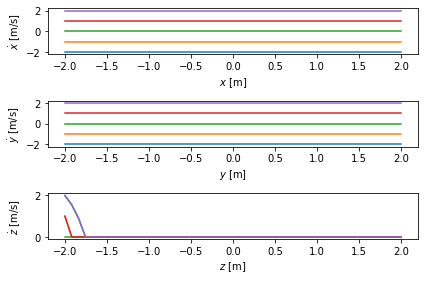

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Simulation parameters
standard_gravity = 9.80665  # m/s/s
number_of_degrees_of_freedom = 3

# Initial conditions
number_of_initial_conditions = 5
## x-dot_0 = {-2, -2+1, ... , -2 + N_initial conditions}
initial_x_velocity_minimum = -2
initial_x_velocity_maximum = -initial_x_velocity_minimum
initial_x_velocity_values = np.linspace(initial_x_velocity_minimum, initial_x_velocity_maximum, number_of_initial_conditions)
## y-dot_0 = {-2, -2+1, ... , -2 + N_initial conditions}
initial_y_velocity_minimum = -2
initial_y_velocity_maximum = -initial_y_velocity_minimum
initial_y_velocity_values = np.linspace(initial_y_velocity_minimum, initial_y_velocity_maximum, number_of_initial_conditions)
## z-dot_0 = {-2, -2+1, ... , -2 + N_initial conditions}
initial_z_velocity_minimum = -2
initial_z_velocity_maximum = -initial_z_velocity_minimum
initial_z_velocity_values = np.linspace(initial_z_velocity_minimum, initial_z_velocity_maximum, number_of_initial_conditions)

# Set up plots
figure, axes = plt.subplots(cols=number_of_degrees_of_freedom)

# Generalized velocity functions of generalized coordinates
## x-dot
def x_dot(x, x_dot_naught=0, x_naught=0, y_dot_naught=0, y_naught=0, z_dot_naught=0, z_naught=0):
    return x_dot_naught

## y-dot
def y_dot(y, x_dot_naught=0, x_naught=0, y_dot_naught=0, y_naught=0, z_dot_naught=0, z_naught=0):
    return y_dot_naught

## z-dot
def z_dot(z, x_dot_naught=0, x_naught=0, y_dot_naught=0, y_naught=0, z_dot_naught=0, z_naught=0):
    if z_dot_naught**2 > 2*standard_gravity*(z-z_naught):
        return np.sqrt(z_dot_naught**2 - 2*standard_gravity*(z - z_naught))
    else:
        return 0

# Set plot range
## x
x_minimum, x_maximum = -2, 2
x_values = np.linspace(x_minimum, x_maximum)
## y
y_minimum, y_maximum = -2, 2
y_values = np.linspace(y_minimum, y_maximum)
## z
z_minimum, z_maximum = -2, 2
z_values = np.linspace(z_minimum, z_maximum)

# Plot 
# x-dot(x)
for initial_x_velocity in initial_x_velocity_values:
    x_dot_values = []
    for x in x_values:
        x_dot_values.append(x_dot(x, x_dot_naught=initial_x_velocity, x_naught=x_minimum))
    axes[0].plot(x_values, x_dot_values)
# y-dot(y)
for initial_y_velocity in initial_y_velocity_values:
    y_dot_values = []
    for y in y_values:
        y_dot_values.append(y_dot(y, y_dot_naught=initial_y_velocity, y_naught=y_minimum))
    axes[1].plot(y_values, y_dot_values)
# z-dot(z)
for initial_z_velocity in initial_z_velocity_values:
    z_dot_values = []
    for z in z_values:
        z_dot_values.append(z_dot(z, z_dot_naught=initial_z_velocity, z_naught=z_minimum))
    axes[2].plot(z_values, z_dot_values)


# Set up labels for axes
generalized_coordinate_labels = [r'$x$ [m]', r'$y$ [m]', r'$z$ [m]']
generalized_velocity_labels = [r'$\dot{x}$ [m/s]', r'$\dot{y}$ [m/s]', r'$\dot{z}$ [m/s]']
for variable_index in range(len(generalized_coordinate_labels)):
    axes[variable_index].set_xlabel(generalized_coordinate_labels[variable_index])
    axes[variable_index].set_ylabel(generalized_velocity_labels[variable_index])


# Format plot
figure.tight_layout()  # minimize white space between subplots
figure.align_labels()  # line up axis labels on subplots
plt.show()


## Hamiltonian Approach

$V = mgz$

$T = \frac{1}{2m} \left(p_x^2 + p_y^2 + p_z^2\right)$

$\mathcal{H}(z, p_x, p_y, p_z) = \frac{1}{2m} \left(p_x^2 + p_y^2 + p_z^2\right) + mgz$

Since $\mathcal{H} \neq \mathcal{H}(x, y)$, $x$ and $y$ are ignorable $\Rightarrow$ $p_x$ and $p_y$ are constants ($p_x = p_{x0}$ & $p_y = p_{y0}$)

$
\begin{array}{ll}
 \dot{z} = \frac{\partial \mathcal{H}}{\partial p_z} & \dot{p}_z = -\frac{\partial \mathcal{H}}{\partial z} \\
\end{array}
$

$
\begin{array}{ll}
 \dot{z} = \frac{p_z}{m} & \dot{p}_z = -mg \\
\end{array}
$

$
\begin{array}{l}
 \ddot{z} = \frac{\dot{p}_z}{m} = \frac{-mg}{m} = -g
 \end{array}
$

Since $\mathcal{H} \neq \mathcal{H}(t)$, $\frac{\partial \mathcal{H}}{\partial t} = 0 \Rightarrow \mathcal{H} = E$

$E = \frac{1}{2 m}\left(p_{x0}^2 + p_{y0}^2 + p_z^2\right) + mgz$

$p_z = \pm \sqrt{2m\left(E - mgz\right) - \left(p_{x0}^2 + p_{y0}^2\right)}$

Collecting constant quantities:
$p_z = \pm \sqrt{\left(2mE - p_{x0}^2 - p_{y0}^2\right) - (2 m^2 g) z}$

At $z = 0$, $E = \frac{1}{2m}\left( p_{x0}^2 + p_{y0}^2 + {p_{z}(z=0)}^2\right)$
$\Rightarrow {p_{z}(z=0)}^2 = 2mE - p_{x0}^2 - p_{y0}^2$

$p_z = \pm \sqrt{p_{z}(z=0)^2 - \left(2 m^2 g\right) z}$

### Phase space plots

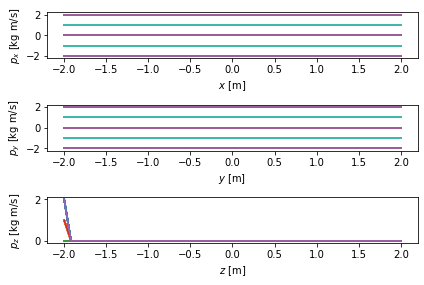

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Simulation parameters
standard_gravity = 9.80665  # m/s/s
number_of_degrees_of_freedom = 3
object_mass = 5.  # kg

# Initial conditions
number_of_initial_conditions = 5
## p_x_0 = {-2, -2+1, ... , -2 + N_initial conditions}
initial_x_momentum_minimum = -2
initial_x_momentum_maximum = -initial_x_momentum_minimum
initial_x_momentum_values = np.linspace(initial_x_momentum_minimum, initial_x_momentum_maximum, number_of_initial_conditions)
## p_y_0 = {-2, -2+1, ... , -2 + N_initial conditions}
initial_y_momentum_minimum = -2
initial_y_momentum_maximum = -initial_y_momentum_minimum
initial_y_momentum_values = np.linspace(initial_y_momentum_minimum, initial_y_momentum_maximum, number_of_initial_conditions)
## p_z_0 = {-2, -2+1, ... , -2 + N_initial conditions}
initial_z_momentum_minimum = -2
initial_z_momentum_maximum = -initial_z_momentum_minimum
initial_z_momentum_values = np.linspace(initial_z_momentum_minimum, initial_z_momentum_maximum, number_of_initial_conditions)

# Set up plots
figure, axes = plt.subplots(number_of_degrees_of_freedom)

# Generalized momentum functions of generalized coordinates
## p_x
def p_x(x, p_x_naught=0, x_naught=0, p_y_naught=0, y_naught=0, p_z_naught=0, z_naught=0, mass=0):
    return p_x_naught

## p_y
def p_y(y, p_x_naught=0, x_naught=0, p_y_naught=0, y_naught=0, p_z_naught=0, z_naught=0, mass=0):
    return p_y_naught

## p_z
def p_z(z, p_x_naught=0, x_naught=0, p_y_naught=0, y_naught=0, p_z_naught=0, z_naught=0, mass=0):
    energy = (p_x_naught**2 + p_y_naught**2 + p_z_naught**2)/(2*mass) + mass * standard_gravity * z_naught
    p_z_zero_square = 2*mass*energy - p_x_naught**2 - p_y_naught**2
    if p_z_zero_square > 2*mass**2*standard_gravity*z:
        return np.sqrt(p_z_zero_square - 2*mass**2*standard_gravity*z)
    else:
        return 0

# Set plot range
## x
x_minimum, x_maximum = -2, 2
x_values = np.linspace(x_minimum, x_maximum)
## y
y_minimum, y_maximum = -2, 2
y_values = np.linspace(y_minimum, y_maximum)
## z
z_minimum, z_maximum = -2, 2
z_values = np.linspace(z_minimum, z_maximum)

# Plot 
for initial_x_momentum in initial_x_momentum_values: 
    for initial_y_momentum in initial_y_momentum_values: 
        for initial_z_momentum in initial_z_momentum_values:
            p_x_values, p_y_values, p_z_values = [], [], []
            for x in x_values:
                p_x_values.append(p_x(x, p_x_naught=initial_x_momentum, x_naught=x_minimum))
            axes[0].plot(x_values, p_x_values)
            for y in y_values:
                p_y_values.append(p_y(y, p_y_naught=initial_y_momentum, y_naught=y_minimum))
            axes[1].plot(y_values, p_y_values)
            for z in z_values:
                p_z_values.append(p_z(z, p_x_naught=initial_x_momentum, p_y_naught=initial_y_momentum, p_z_naught=initial_z_momentum, z_naught=z_minimum, mass=object_mass))
            axes[2].plot(z_values, p_z_values)

# Set up labels for axes
generalized_coordinate_labels = [r'$x$ [m]', r'$y$ [m]', r'$z$ [m]']
generalized_momentum_labels = [r'$p_x$ [kg m/s]', r'$p_y$ [kg m/s]', r'$p_z$ [kg m/s]']
for variable_index in range(len(generalized_coordinate_labels)):
    axes[variable_index].set_xlabel(generalized_coordinate_labels[variable_index])
    axes[variable_index].set_ylabel(generalized_momentum_labels[variable_index])

# Format plot
figure.tight_layout()  # minimize white space between subplots
figure.align_labels()  # line up axis labels on subplots
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=54116920-ee1e-4cba-9c74-77c1d3ea31d8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>